## Swipe - Distance

In [1]:
data_swipe_dist = {}
for i in range(0, 67):
    try:
        with open('com.huawei.handrecognition/files/' + str(i) + '_Swipe_Gestures/coordinates.txt') as f:
            data = f.read().split('\n')
        data_swipe_dist[i] = [line.split(', ') for line in data]
        print(i, len(data_swipe_dist[i]))
    except:
        continue

1 1192
2 527
3 728
5 865
6 355
7 592
9 478
10 59
11 794
12 561
13 835
14 397
15 592
17 661
18 702
62 591
65 384


In [2]:
def getDirection(diffX, diffY):
    message = ''
    # get slope
    if diffX == 0: diffX = 1
    slope = diffY/diffX
    unitStep, smallStep, largeStep = (math.pi/8), (math.pi*35/360), (math.pi*55/360)
    if (slope >= math.tan(2*math.pi-smallStep) and slope <= math.tan(smallStep)):
        if(diffX > 0):
            message="Right"
        else:
            message="Left"
    elif (slope >= math.tan(smallStep) and slope <= math.tan(math.pi/2-smallStep)):
        if(diffX > 0):
            message = "Down Right"
        else:
            message = "Up Left"
    elif (slope >= math.tan(math.pi/2-smallStep) or slope <= math.tan(math.pi/2+smallStep)):
        if(diffY > 0):
            message = "Up"
        else:
            message = "Down"
    elif (slope >= math.tan(3*math.pi/2+smallStep) and slope <= math.tan(2*math.pi-smallStep)):
        if(diffX > 0):
            message = "Up Right"
        else:
            message = "Down Left"
    return message

In [3]:
import math
import pandas as pd
summary = []
for key, lines in data_swipe_dist.items():
    for line in lines[:-1]:
        one, two = float(line[1].split(' ')[1]), float(line[2].split(' ')[1])
        if line[0] == 'ACTION DOWN':
            X1, Y1 = one, two
        elif line[0] == 'ACTION UP':
            X2, Y2 = one, two
            dX, dY = X2-X1, Y2-Y1
            distance = math.sqrt(dX**2 + dY**2)
            if distance > 100:
                summary.append([key, X1, X2, dX, Y1, Y2, -1*dY, round(distance, 1), getDirection(dX, dY)])
df_swipe_dist = pd.DataFrame(summary, columns =['PID', 'X1', 'X2', 'dX', 'Y1', 'Y2', 'dY', 'dist', 'dir'])
df_swipe_dist

,PID,X1,X2,dX,Y1,Y2,dY,dist,dir
0,1,1091.0,50.0,-1041.0,549.0,542.0,7.0,1041.0,Left
1,1,950.0,1609.0,659.0,581.0,977.0,-396.0,768.8,Down Right
2,1,1109.0,204.0,-905.0,705.0,124.0,581.0,1075.4,Up Left
3,1,1006.0,257.0,-749.0,679.0,219.0,460.0,879.0,Up Left
4,1,944.0,1550.0,606.0,601.0,122.0,479.0,772.4,Up Right
...,...,...,...,...,...,...,...,...,...
516,65,816.0,1312.0,496.0,752.0,776.0,-24.0,496.6,Right
517,65,597.0,1142.0,545.0,674.0,360.0,314.0,629.0,Up Right
518,65,1092.0,812.0,-280.0,751.0,563.0,188.0,337.3,Up Left
519,65,845.0,810.0,-35.0,386.0,714.0,-328.0,329.9,Up


## Swipe - Time (Speed)

In [4]:
data_swipe_time = {}
for i in range(0, 67):
    try:
        with open('com.huawei.handrecognition/files/' + str(i) + '_Swipe_Gestures/gestures.txt') as f:
            data = f.read().split('\n')
        data_swipe_time[i] = [line.split(', ') for line in data]
    except:
        continue

In [5]:
summary = []
for key, lines in data_swipe_time.items():
    for line in lines[:-1]:
        dir_time = line[0][5:]
        one, two = int(line[1].split(' ')[1]), int(line[2].split(' ')[1])
        summary.append([key, two-one, dir_time])
df_swipe_time = pd.DataFrame(summary, columns =['PID', 'dT', 'dir'])
df_swipe_time

,PID,dT,dir
0,1,323,Left
1,1,521,Down Right
2,1,629,Up Left
3,1,431,Up Right
4,1,627,Down Left
...,...,...,...
506,65,213,Right
507,65,309,Up Right
508,65,360,Up Left
509,65,300,Down


## Match Time and Dist

In [6]:
rows = []
for key, lines_time in data_swipe_time.items():
    df = df_swipe_dist[df_swipe_dist['PID'] == key].copy()
    index_time = 0
    for index_dist, row in df.iterrows():
        dir_time = lines_time[index_time][0][5:]
        if row['dir'] == dir_time:
            ST = int(lines_time[index_time][1].split(' ')[1])
            FT = int(lines_time[index_time][2].split(' ')[1])
            dT = FT - ST
            V = int(row['dist']/dT*1000)
            rows.append([key, row['dX'], row['dY'], row['dist'], dT, V, dir_time])
            index_time += 1
df_swipe = pd.DataFrame(rows, columns =['PID', 'dX', 'dY', 'dist', 'dT', 'V', 'dir'])
df_swipe

,PID,dX,dY,dist,dT,V,dir
0,1,-1041.0,7.0,1041.0,323,3222,Left
1,1,659.0,-396.0,768.8,521,1475,Down Right
2,1,-905.0,581.0,1075.4,629,1709,Up Left
3,1,606.0,479.0,772.4,431,1792,Up Right
4,1,-626.0,-481.0,789.5,627,1259,Down Left
...,...,...,...,...,...,...,...
172,65,-393.0,-203.0,442.3,259,1707,Down Left
173,65,433.0,-1.0,433.0,182,2379,Right
174,65,-18.0,-335.0,335.5,306,1096,Up
175,65,-2.0,435.0,435.0,236,1843,Down


In [7]:
print(df_swipe['dist'].describe())
print(df_swipe['V'].describe())

count     177.000000
mean      705.521469
std       212.921985
min       239.900000
25%       555.600000
50%       671.000000
75%       820.800000
max      1586.700000
Name: dist, dtype: float64
count     177.000000
mean     2676.084746
std      1305.693215
min       795.000000
25%      1829.000000
50%      2379.000000
75%      3222.000000
max      7851.000000
Name: V, dtype: float64


## Virtual Plane

In [8]:
import matplotlib.pyplot as plt

In [9]:
def remove_outliers(org_df, column, k=3):
    import numpy as np
    data = org_df.loc[:,column]
    df = org_df.copy()
    # std
    datalist = data.tolist()
    import statistics
    mu, std = statistics.mean(datalist), statistics.stdev(datalist)
    max_val = mu + k*std
    min_val = mu - k*std
#     print(max(int(min_val), 0), int(mu), int(max_val))
    # quarters
#     q75, q25 = np.percentile(data,[75,25])
#     intr_qr = q75-q25
#     max_val = q75+(1.5*intr_qr)
#     min_val = q25-(1.5*intr_qr)
    # filter
    df.loc[org_df[column] < min_val, column] = 'OL'
    df.loc[org_df[column] > max_val, column] = 'OL'
    return df[df[column] != 'OL']

In [10]:
def min_max(df, ratio):
    x1_min, x1_max = df['X1'].min(), df['X1'].max()
    x2_min, x2_max = df['X2'].min(), df['X2'].max()
    x_min, x_max = min([x1_min, x2_min])*ratio, max([x1_max, x2_max])*ratio
    y1_min, y1_max = df['Y1'].min(), df['Y1'].max()
    y2_min, y2_max = df['Y2'].min(), df['Y2'].max()
    y_min, y_max = min([y1_min, y2_min])*ratio, max([y1_max, y2_max])*ratio
    return x_min, x_max, y_min, y_max

In [19]:
def plane(df, ratio, k, c):
    for index, row in df.iterrows():
        x, y = [row['X1']*ratio, row['X2']*ratio], [row['Y1']*ratio, row['Y2']*ratio]
        plt.plot(x, y, color=c)
    for m in ['X1', 'X2', 'Y1', 'Y2']:
        df = remove_outliers(df, m, k).copy()
    x_min, x_max, y_min, y_max = min_max(df, ratio)
    plt.plot([x_min, x_max], [y_min, y_min], color='black')
    plt.plot([x_min, x_max], [y_max, y_max], color='black')
    plt.plot([x_min, x_min], [y_min, y_max], color='black')
    plt.plot([x_max, x_max], [y_min, y_max], color='black')
    h, w = y_max-y_min, x_max-x_min
    print(round(h, 1), round(w, 1))
    area = h*w
#     plt.show()
    return round(area)

## Midair

In [12]:
with open('air_log.json', 'r') as f:
    air_log = f.read().split('}{')
air_log = [air_log[0] + ' }'] + ['{ ' + air_log[i] + ' }' for i in range(1, len(air_log)-1)] + ['{ ' + air_log[-1]]
air_log = [eval(line) for line in air_log]
rows = [[line['ID'], int(line['COR_X']['S']), int(line['COR_X']['F']), int(line['COR_Y']['S']), \
         int(line['COR_Y']['F']), int(line['DIST']), int(line['SPD'])] for line in air_log]
df_midair = pd.DataFrame(rows, columns = ['PID', 'X1', 'X2', 'Y1', 'Y2', 'dist', 'V'])
df_midair

,PID,X1,X2,Y1,Y2,dist,V
0,0,30,125,302,347,105,194
1,0,49,84,338,235,108,492
2,0,234,224,194,323,129,379
3,0,180,295,340,299,122,254
4,0,115,228,302,339,118,211
...,...,...,...,...,...,...,...
1191,8,307,308,367,261,106,204
1192,8,350,258,272,329,108,257
1193,8,313,234,322,251,106,189
1194,8,226,219,356,468,112,559


In [13]:
print(df_midair['dist'].describe())
print(df_midair['V'].describe())

count    1196.000000
mean      113.714047
std        26.411805
min       100.000000
25%       104.000000
50%       110.000000
75%       116.000000
max       621.000000
Name: dist, dtype: float64
count    1196.000000
mean      451.066054
std       266.771304
min        18.000000
25%       271.750000
50%       385.000000
75%       568.250000
max      1802.000000
Name: V, dtype: float64


35.4 41.8
14.4 23.0
331 1480 4.47


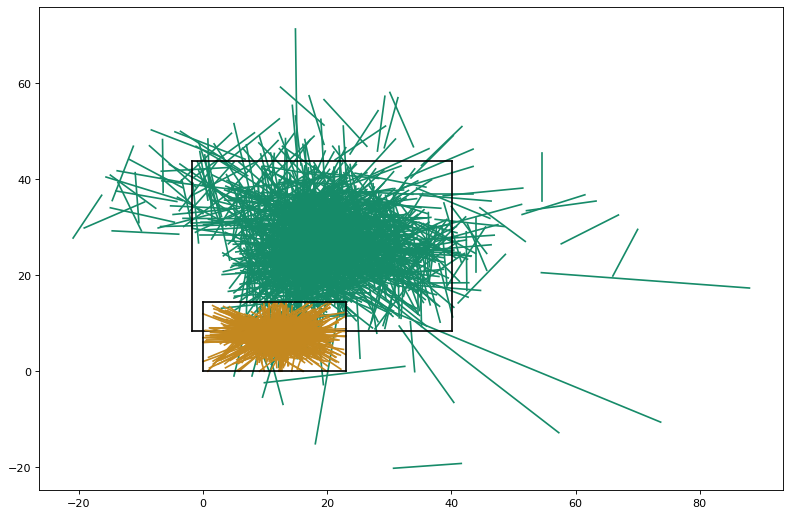

In [20]:
k = 2
fig = plt.figure(figsize=(12, 8), dpi=80)
area_midair = plane(df_midair, 0.1, k, '#168b69')
area_swipe = plane(df_swipe_dist, 0.12 * 0.1, k, '#c3881f')
title, frmt = 'Virtual Plane', 'png'
fig.savefig('Figs/'+title+'.'+frmt, dpi=300)
print(area_swipe, area_midair, round(area_midair/area_swipe, 2))